In [95]:
pip install -r Requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math

In [97]:
# loading data set
# x_train = np.array([1.0, 2.0, 3.0, 4.0 ,5.0])   #features
# y_train = np.array([300.0, 500.0, 700.0, 830.0, 1000.0])   #target value
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [98]:
#calculating the cost 
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost =0
    for i in range(m):
        f_wb = w*x[i]+b
        cost= cost + (f_wb - y[i])**2
    total_cost = 1/(2*m)*cost

    return total_cost
                                  

In [99]:
#calculating the gradient
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw=0 #partial derivative of cost function w.r.t. w
    dj_db=0 #partial derivative of cost function w.r.t. b
    for i in range(m):
        f_wb = w*x[i]+b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    return dj_dw, dj_db

In [100]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_hist (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_hist = []
    p_hist = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_hist.append( cost_function(x, y, w , b))
            p_hist.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_hist[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_hist, p_hist #return w and J,w history for graphing

In [101]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.67e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+01, b: 4.00000e+01
Iteration 1000: Cost 6.33e-06  dj_dw: -5.091e-04, dj_db:  8.238e-04   w:  2.000e+02, b: 1.00011e+02
Iteration 2000: Cost 2.77e-12  dj_dw: -3.366e-07, dj_db:  5.446e-07   w:  2.000e+02, b: 1.00000e+02
Iteration 3000: Cost 1.21e-18  dj_dw: -2.225e-10, dj_db:  3.600e-10   w:  2.000e+02, b: 1.00000e+02
Iteration 4000: Cost 5.49e-25  dj_dw: -1.705e-13, dj_db:  2.274e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 5000: Cost 1.05e-25  dj_dw: -1.421e-13, dj_db:  5.684e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 6000: Cost 1.05e-25  dj_dw: -1.421e-13, dj_db:  5.684e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 7000: Cost 1.05e-25  dj_dw: -1.421e-13, dj_db:  5.684e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 8000: Cost 1.05e-25  dj_dw: -1.421e-13, dj_db:  5.684e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 1.05e-25  dj_dw: -1.421e-13, dj_db:  5.684e-14   w:  2.000e+02, b: 1.00000e+02


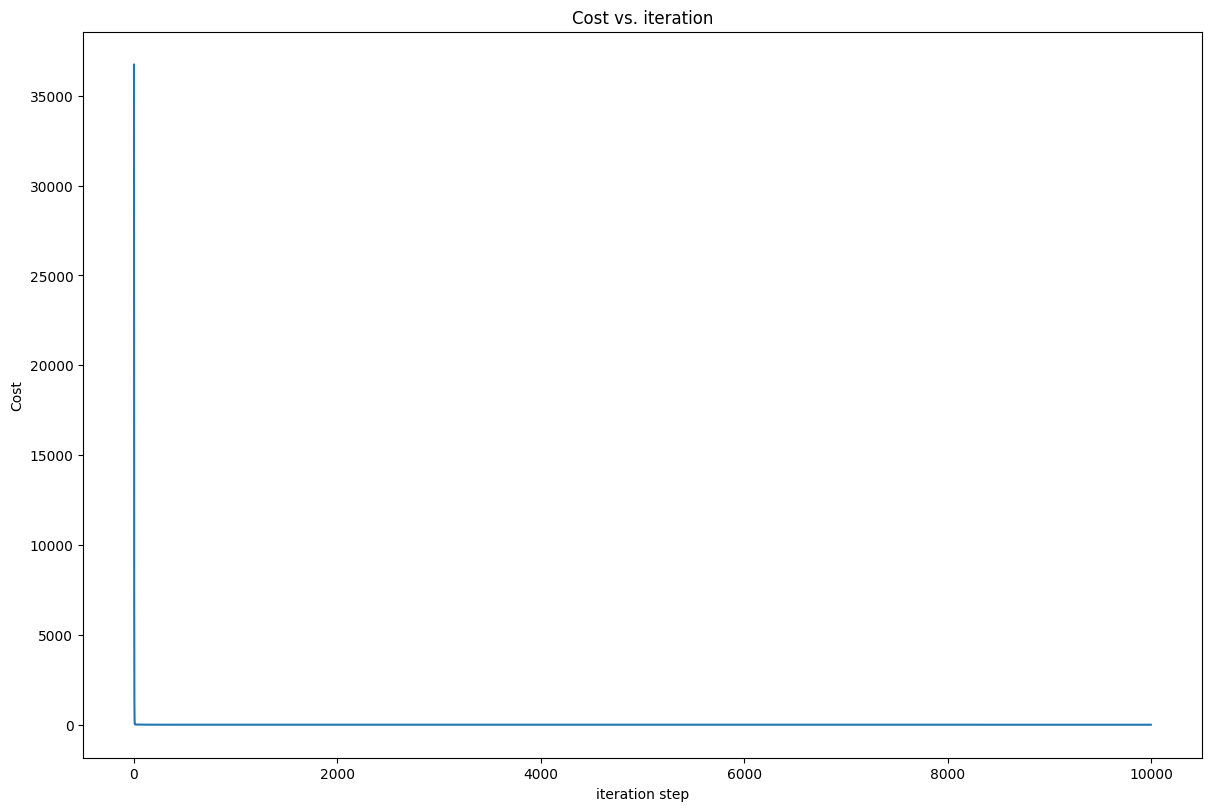

In [102]:
# plot cost versus iteration  
fig, (ax1) = plt.subplots( constrained_layout=True, figsize=(12,8))
ax1.plot(J_hist)

ax1.set_title("Cost vs. iteration");  
ax1.set_ylabel('Cost')            ;  
ax1.set_xlabel('iteration step')  ;  
plt.show()

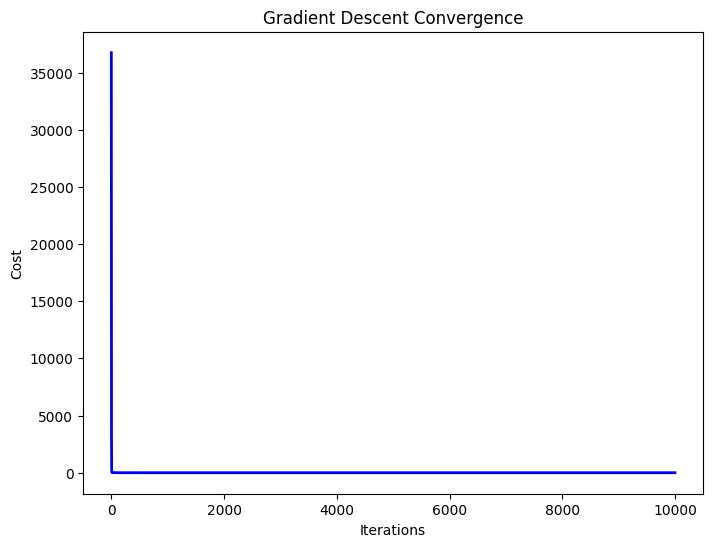

In [103]:
# 2D Visualization: Cost vs Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(J_hist)), J_hist, 'b-', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()



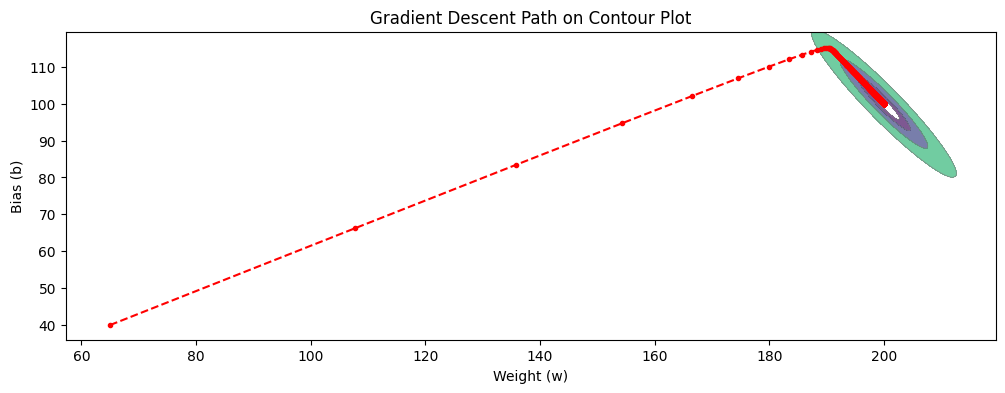

In [104]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)